<a href="https://colab.research.google.com/github/njocimar28/nba/blob/main/Analisando_pr%C3%B3ximas_temporadas_NBA_(modelo_preditivo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prevendo as próximas temporadas para o jogador selecionado (temporada 2024, 2025 e 2026)**


Escolha o jogador que deseja analisar as próximas temporadas:
------------------------------------------------------------
"Luka Doncic" [1] / "Trae Young" [2] / "Jayson Tatum" [3]
------------------------------------------------------------
Digite o número do jogador desejado: 1
------------------------------------------------------------
Processando.........................................


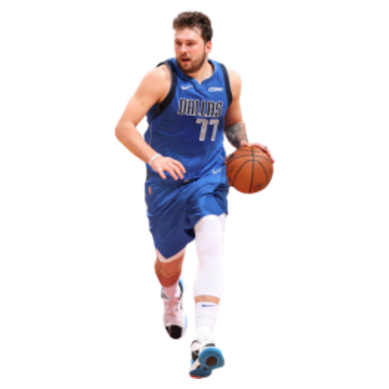

,Jogador,Ano,GP,GS,FG_PCT,FG3_PCT,FT_PCT,MEDIA_MIN,MEDIA_REB,MEDIA_AST,MEDIA_PTS,MEDIA_STL,MEDIA_BLK
0,Luka Doncic,2024,64.2,64.2,0.5,0.4,0.8,37.2,8.9,8.3,33.4,1.5,0.9
1,Luka Doncic,2025,62.5,62.5,0.5,0.4,0.8,38.3,9.1,8.7,34.5,1.6,1.4
2,Luka Doncic,2026,60.7,60.7,0.5,0.4,0.8,39.4,9.4,9.0,35.7,1.7,1.8


In [48]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from time import sleep
from PIL import Image
import requests
from io import BytesIO

# selecionando os dados
jovens_jogadores = pd.read_csv('https://github.com/njocimar28/nba/blob/1cb3595d502f52e2d190f23c82e420d545a03f8b/jovens_jogadores_nba.csv?raw=true')

atributos = [
    "GP",
    "GS",
    "FGA",
    "FGM",
    "FG3A",
    "FG3M",
    "FTA",
    "FTM",
    "MIN",
    "REB",
    "AST",
    "PTS",
    "STL",
    "BLK"
]

# Criando o modelo para prever estatísticas 
list_jovens_jogadores = ["Luka Doncic", "Jayson Tatum", "Trae Young"]
previsoes = []
jogador_coluna = []
anos_previsao = [2024, 2025, 2026]
temporada_prevista = []

for jogador in list_jovens_jogadores:
    resultado_query = jovens_jogadores.query("JOGADOR == @jogador")
    
    # Verificar se há dados disponíveis para o jogador atual
    if resultado_query.empty:
        print(f"Dados não disponíveis para o jogador {jogador}")
        continue
    
    # Separar os atributos históricos (X) e o atributo alvo (y)
    X = resultado_query['Temporada'].values
    y = resultado_query[atributos].values
    
    # Calcular a média da carreira ignorando o menor e o maior valor
    media_carreira = np.mean(y[1:-1], axis=0)
    
    # Calcular a taxa de crescimento com base apenas na temporada anterior
    taxas_crescimento = (y[1:] - y[:-1]) / y[:-1] * 100  # em porcentagem
    taxa_crescimento_media = np.mean(taxas_crescimento, axis=0)
    
    # Loop para prever os pontos para cada ano
    for ano in anos_previsao:
        # Calcular a previsão com base na média da carreira e na taxa de crescimento média
        previsao = y[-1] + (ano - X[-1]) * taxa_crescimento_media
        
        # Adicionar a previsão à lista de previsões
        previsoes.append(previsao)
        jogador_coluna.append(jogador)
        temporada_prevista.append(ano)

# Ajustando Data Frame
previsoes_df = pd.DataFrame(previsoes, columns=atributos)
previsoes_df.insert(0, 'Ano', temporada_prevista)
previsoes_df.insert(0, 'Jogador', jogador_coluna)

# Criando as colunas porcentagens de arremesso
lista_arremessos = ['FG', 'FG3', 'FT']
for i in lista_arremessos:
  previsoes_df[i + '_PCT'] = (previsoes_df[i + 'M'] / previsoes_df[i + 'A']).round(2)

# Criando as colunas com media por jogo
lista_de_estatisticas = ['MIN','REB', 'AST','PTS', 'STL','BLK']
for i in lista_de_estatisticas:
  previsoes_df['MEDIA_'+ i] = (previsoes_df[i] / previsoes_df['GP']).round(2)

# Escolhendo as colunas que serão exibidas
lista_principais_estatiticas = [
    "Jogador",
    "Ano",
    "GP",
    "GS",
    "FG_PCT",
    "FG3_PCT",
    "FT_PCT",
    "MEDIA_MIN",
    "MEDIA_REB",
    "MEDIA_AST",
    "MEDIA_PTS",
    "MEDIA_STL",
    "MEDIA_BLK"
]

print("Escolha o jogador que deseja analisar as próximas temporadas:")
print("-"*60)
print('"Luka Doncic" [1] / "Trae Young" [2] / "Jayson Tatum" [3]')
print("-"*60)
jogador = int(input('Digite o número do jogador desejado: '))# Mapear o número do jogador para o nome correspondente
print("-"*60)
print("Processando.........................................")
sleep(2)

jogadores = {
    1: "Luka Doncic",
    2: "Trae Young",
    3: "Jayson Tatum"
}

# Mapear o número do jogador para o nome correspondente
jogador_selecionado = jogadores.get(jogador)

# URL da imagem
url_imagens = {
    "Luka Doncic": 'https://www.thesportsdb.com/images/media/player/render/small/r3fiwj1645309310.png',
    "Trae Young": 'https://www.thesportsdb.com/images/media/player/render/small/5afv8i1640779928.png',
    "Jayson Tatum": 'https://www.thesportsdb.com/images/media/player/render/small/zydnd11628337345.png'
}

# Obter a imagem a partir do URL
url_imagem = url_imagens.get(jogador_selecionado)
response = requests.get(url_imagem)
imagem = Image.open(BytesIO(response.content))

# Redimensionar a imagem para um tamanho específico
tamanho_desejado = (800, 800)
imagem_redimensionada = imagem.resize(tamanho_desejado)

# Exibir a imagem redimensionada
plt.imshow(imagem_redimensionada)
plt.axis('off')  # Desativar os eixos
plt.show()


# Filtrar o DataFrame com base no jogador selecionado
previsoes_df_filtrado = previsoes_df[previsoes_df['Jogador'] == jogadores[jogador]].round(1)
previsoes_df_filtrado = previsoes_df_filtrado[lista_principais_estatiticas]
previsoes_df_filtrado.head(3)